# Visualizing the distribution of a dataset 

Saat berurusan dengan satu set data, seringkali hal pertama yang ingin kita lakukan adalah memahami bagaimana variabel-variabel didistribusikan. Bab tutorial ini akan memberikan pengantar singkat ke beberapa alat di seaborn untuk memeriksa distribusi univariat dan bivariat. Anda mungkin juga ingin melihat bab plot kategorikal untuk contoh-contoh fungsi yang membuatnya mudah untuk membandingkan distribusi suatu variabel lintas level variabel lain.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set(color_codes=True)

# Plotting univariate distributions

Cara paling mudah untuk melihat secara cepat distribusi univariat di seaborn adalah fungsi distplot (). Secara default, ini akan menggambar histogram dan sesuai dengan estimasi kepadatan kernel (KDE).

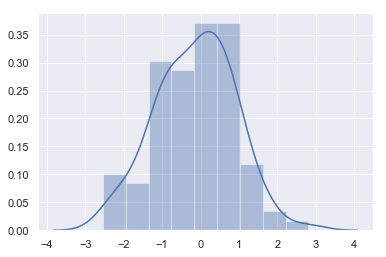

In [3]:
x = np.random.normal(size=100)
sns.distplot(x);

# Histogram

Histogram sepertinya sudah biasa, dan fungsi hist sudah ada di matplotlib. Histogram mewakili distribusi data dengan membentuk nampan di sepanjang rentang data dan kemudian menggambar bar untuk menunjukkan jumlah pengamatan yang jatuh di setiap nampan.

Untuk mengilustrasikan ini, mari kita hapus kurva kepadatan dan tambahkan plot karpet, yang menarik centang vertikal kecil di setiap pengamatan. Anda dapat membuat plot karpet sendiri dengan fungsi rugplot (), tetapi juga tersedia di distplot ():

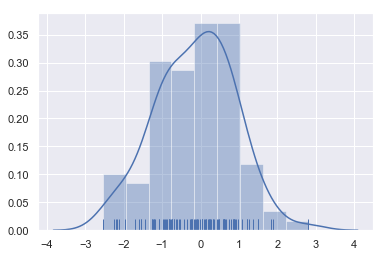

In [4]:
sns.distplot(x, kde=True, rug=True);

Saat menggambar histogram, pilihan utama yang Anda miliki adalah jumlah nampan untuk digunakan dan di mana menempatkannya. distplot () menggunakan aturan sederhana untuk membuat perkiraan yang baik untuk angka yang tepat secara default, tetapi mencoba lebih banyak atau lebih sedikit tempat sampah dapat mengungkapkan fitur lain dalam data:

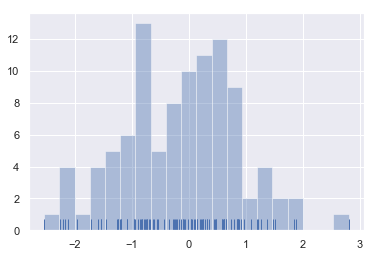

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True);

# Kernel density estimation

Perkiraan kepadatan kernel mungkin kurang dikenal, tetapi bisa menjadi alat yang berguna untuk merencanakan bentuk distribusi. Seperti histogram, plot KDE menyandikan kepadatan pengamatan pada satu sumbu dengan ketinggian di sepanjang sumbu lainnya:

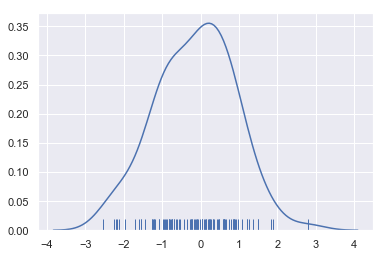

In [6]:
sns.distplot(x, hist=False, rug=True);

Menggambar KDE lebih melibatkan komputasi daripada menggambar histogram. Apa yang terjadi adalah bahwa setiap pengamatan pertama kali diganti dengan kurva normal (Gaussian) yang berpusat pada nilai itu:

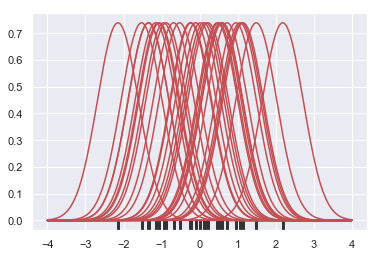

In [7]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

Selanjutnya, kurva ini dijumlahkan untuk menghitung nilai kepadatan di setiap titik di kisi dukungan. Kurva yang dihasilkan kemudian dinormalisasi sehingga area di bawahnya sama dengan 1:

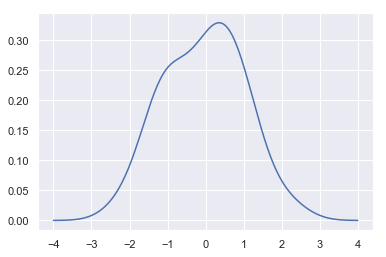

In [8]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

Kita dapat melihat bahwa jika kita menggunakan fungsi kdeplot () di seaborn, kita mendapatkan kurva yang sama. Fungsi ini digunakan oleh distplot (), tetapi ia menyediakan antarmuka yang lebih langsung dengan akses yang lebih mudah ke opsi lain ketika Anda hanya menginginkan estimasi kepadatan:

In [9]:
import numpy as np


In [10]:
import pandas as pd


In [11]:
import seaborn as sns


In [12]:
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
x = np.random.normal(size=100)

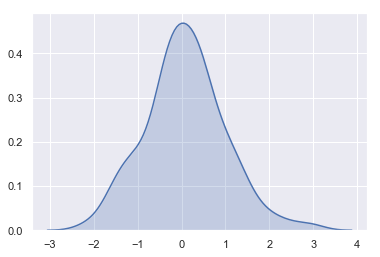

In [14]:
sns.kdeplot(x, shade=True);

Parameter bandwidth ( bw ) dari KDE mengontrol seberapa ketat estimasi ini sesuai dengan data, seperti ukuran bin dalam histogram. Ini sesuai dengan lebar kernel yang kami rencanakan di atas. Perilaku default mencoba menebak nilai yang baik menggunakan aturan referensi umum, tetapi mungkin membantu untuk mencoba nilai yang lebih besar atau lebih kecil:

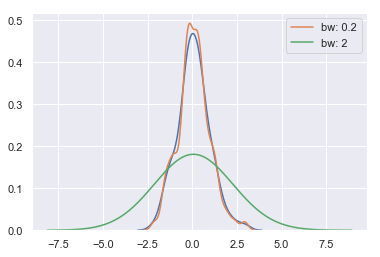

In [15]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

Seperti yang Anda lihat di atas, sifat dari proses Gaussian KDE berarti bahwa estimasi melampaui nilai terbesar dan terkecil dalam dataset. Adalah mungkin untuk mengontrol seberapa jauh melewati nilai ekstrim kurva digambarkan dengan parameter cut ; namun, ini hanya memengaruhi cara kurva digambar dan tidak sesuai dengan kurva:

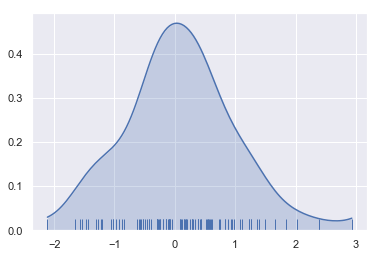

In [16]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

# Fitting parametric distributions

Anda juga dapat menggunakan distplot() agar sesuai dengan distribusi parametrik ke dataset dan secara visual mengevaluasi seberapa dekat itu sesuai dengan data yang diamati:

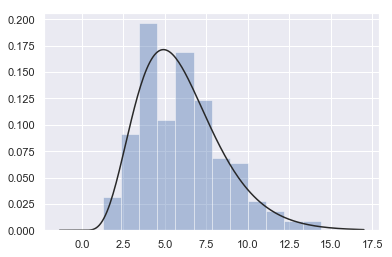

In [17]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

# Plotting bivariate distributions

Juga bermanfaat untuk memvisualisasikan distribusi bivariat dari dua variabel. Cara termudah untuk melakukan ini di seaborn adalah dengan hanya menggunakan fungsi jointplot() , yang menciptakan gambar multi-panel yang menunjukkan hubungan bivariat (atau gabungan) antara dua variabel bersama dengan distribusi univariat (atau marjinal) masing-masing pada kapak yang terpisah.

In [18]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

# Scatterplots

Cara yang paling akrab untuk memvisualisasikan distribusi bivariat adalah sebar, di mana setiap pengamatan ditunjukkan dengan titik pada nilai x dan y . Ini mirip dengan plot karpet pada dua dimensi. Anda dapat menggambar scatterplot dengan fungsi matplotlib plt.scatter , dan itu juga merupakan jenis default plot yang ditunjukkan oleh fungsi jointplot() :

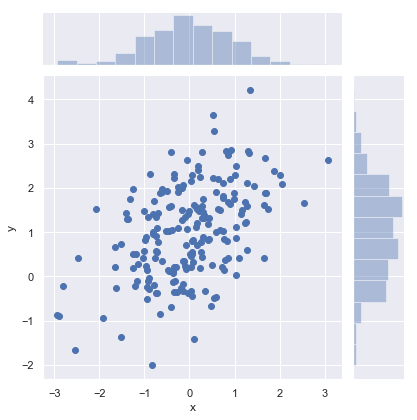

In [19]:
sns.jointplot(x="x", y="y", data=df);

# Hexbin plots

Analog bivariat dari histogram dikenal sebagai plot "heksbin", karena menunjukkan jumlah pengamatan yang termasuk dalam tempat heksagonal. Plot ini berfungsi paling baik dengan kumpulan data yang relatif besar. Ini tersedia melalui fungsi matplotlib plt.hexbin dan sebagai style di jointplot() . Terlihat terbaik dengan latar belakang putih:

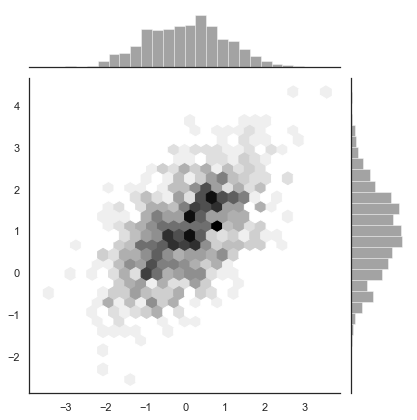

In [20]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

# Kernel density estimation

It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

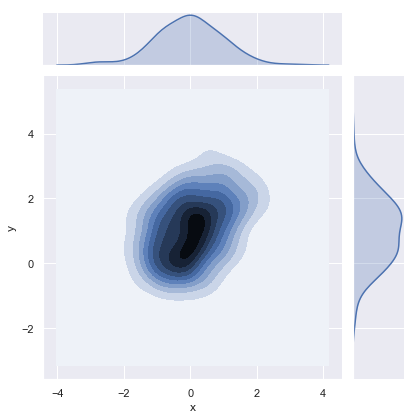

In [21]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

Anda juga dapat menggambar plot densitas kernel dua dimensi dengan fungsi kdeplot() . Ini memungkinkan Anda untuk menggambar plot semacam ini ke sumbu matplotlib tertentu (dan mungkin sudah ada), sedangkan fungsi jointplot() mengelola jointplot() sendiri:

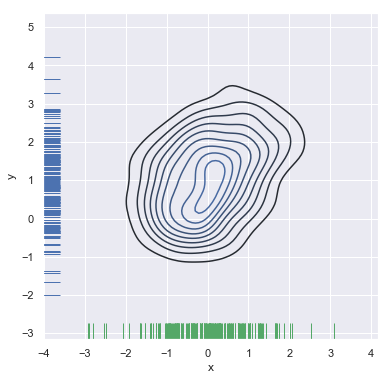

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

Jika Anda ingin menunjukkan kerapatan bivariat lebih kontinu, Anda dapat meningkatkan jumlah level kontur:

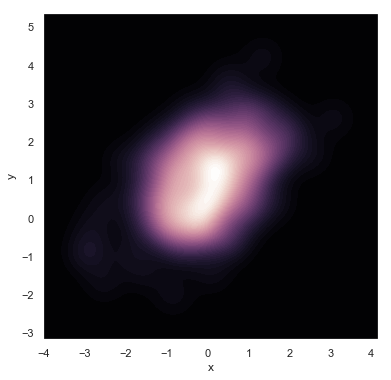

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

Fungsi jointplot() menggunakan JointGrid untuk mengelola gambar. Untuk fleksibilitas lebih, Anda mungkin ingin menggambar sosok Anda dengan menggunakan JointGrid secara langsung. jointplot() mengembalikan objek JointGrid setelah memplot, yang dapat Anda gunakan untuk menambahkan lebih banyak layer atau untuk mengubah aspek lain dari visualisasi:

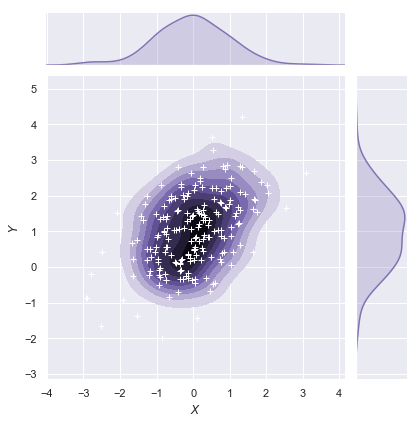

In [24]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

# Visualizing pairwise relationships in a dataset

Untuk memplot beberapa distribusi bivariat berpasangan dalam dataset, Anda dapat menggunakan fungsi pairplot() . Ini menciptakan matriks sumbu dan menunjukkan hubungan untuk setiap pasangan kolom dalam DataFrame. secara default, ini juga menggambar distribusi univariat dari masing-masing variabel pada sumbu diagonal:

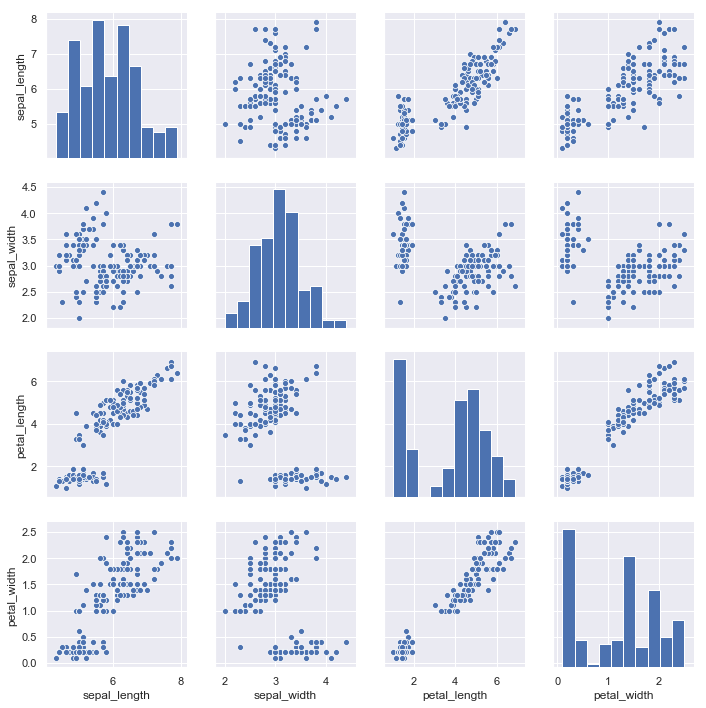

In [25]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Sama seperti hubungan antara jointplot() dan JointGrid , fungsi pairplot() dibangun di atas objek PairGrid , yang dapat digunakan secara langsung untuk lebih banyak fleksibilitas:

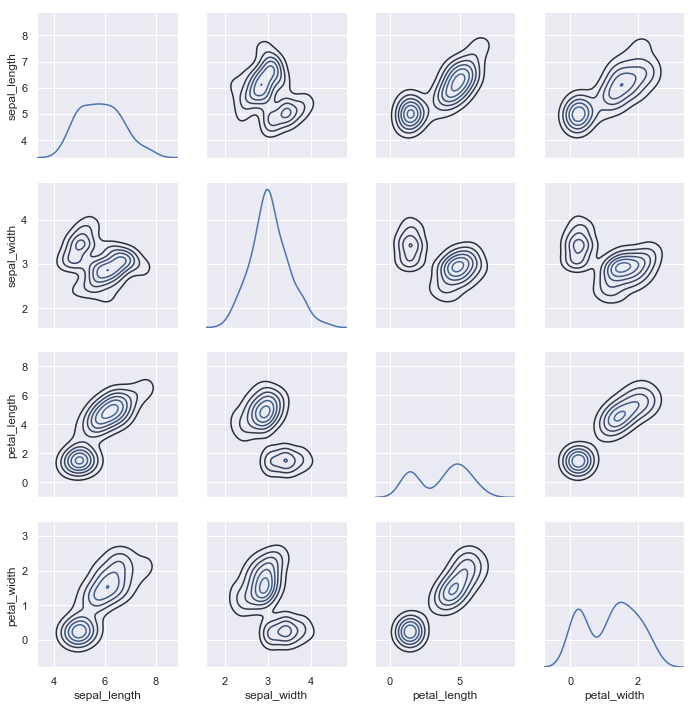

In [26]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);